<!--
<head>
  <h2>Background Image</h2>
    <style="background-image:url('gazeview.jpg'); background-size: cover; min-height: 500px; background-attachment: fixed; background-position: right top; background-repeat:no-repeat;"> 
    </style>
-->
<body>
<div class="background" style="background-image:url('gazeview.jpg'); background-size: cover; min-height: 500px; background-attachment: fixed; background-position: right top; background-repeat:no-repeat;"> 

<!--
<head>
<link href="format.css" type="text/css" rel="stylesheet" />    
</head>    
-->   

<!--
<style>
body{
background-image:url('gazeview.jpg'); 
  background-size: cover; 
  min-height: 500px; 
  background-attachment: fixed; 
  background-position: right top; 
  background-repeat:no-repeat;    
}
-->     
   
## Σκοπός Ειδικού Θέματος

Πειραματική εξέταση του Αλγορίθμου __Random Forests__ στο πρόβλημα του Gaze Recognition



## Δεδομένα

* Ως δεδομένα επέλεξα το <a href="https://www.mpi-inf.mpg.de/de/abteilungen/computer-vision-and-multimodal-computing/research/gaze-based-human-computer-interaction/appearance-based-gaze-estimation-in-the-wild-mpiigaze/"
target="_blank">MPIIGaze Dataset</a> [^3]. Ωστόσο υπάρχουν κι'άλλα dataset, όπως το <a href="https://www.idiap.ch/dataset/eyediap" target="_blank">Eyediap</a> και το <a href="http://www.hci.iis.u-tokyo.ac.jp/datasets/" target="_blank">Multiview Dataset</a> [^2].


* Οι αρχικές εικόνες έχουνε κανονικοποιηθεί με τέτοιο τρόπο, ώστε να εξετάζονται όλες οι εικόνες υπό τις __ίδιες συνθήκες__ .Επίσης κάθε μάτι εξετάζεται __ανεξάρτητα__ από το άλλο.


* Τα δεδομένα που έχουμε στην διάθεση μας είναι:

    1. Οι εικόνες __e__ του κάθε ματιού με διαστάσεις (W,H) = (60,36)

	2. __Ηead Pose__, 2d διάνυσμα γωνιών σε radians(γωνία Theta και γωνία
Phi)

	3. __Gaze__(2d διάνυσμα επίσης σε radians) το όποιο προσπαθούμε να κάνουμε predict. Κάθε μάτι γίνεται predict __ανεξάρτητα__ από το άλλο

	4. Η γωνία __Theta__ εκφράζει την οριζόντια θέση του κεφαλιού. Για
παράδειγμα αν το κεφάλι έχει προσανατολισμό  προς τα __δεξιά__, θα έχει
__θετική__ τιμή, ενώ αν κοιτάει προς τα __αριστερά__, θα έχει __αρνητική__.

	5. Η γωνία __Phi__ λειτουργεί σαν την Theta, αλλά για τον κάθετο άξονα.
Για παράδειγμα, αν το κεφάλι έχει προσανατολισμό προς τα __πάνω__, θα έχει
__θετική τιμή__, ενώ αν κοιτάει προς τα __κάτω__, θα έχει __αρνητική__

	6. Και οι 2 αυτές γωνίες κυμαίνονται στο διάστημα [-30, +30] σε
__μοίρες__


* Για τον αλγόριθμο Random Forest, κάνουμε __reshape__ τις εικόνες των ματιών
  από (W,H) = (__60,36__) σε (__15,9__) τόσο για το __training__, όσο και για το __testing__  





## Υλοποίηση Αλγορίθμου


* Για την υλοποίηση του  αλγορίθμου, βασίστηκα στην αρχική υλοποίηση του Breiman[^1], κάνοντας κάποιες αλλαγές στον τρόπο που διαλέγουμε τα __features__ κατά το split





## Ομαδοποίηση των δεδομένων με βάση τα Head Poses


* Για την υλοποίηση του  αλγορίθμου, αρχικά ομαδοποιούμε τα training samples σε __P pose clusters__, με βάση το __Head Pose__


* Κάθε Cluster έχει ένα __κέντρο__, το οποίο αποτελείται από ένα διάνυσμα
  (__theta, phi__)


* Για να θεωρηθεί ένα διανύσμα (__theta, phi__) ως κέντρο ενός Cluster, θα πρέπει να <b>μην απέχει</b> απόσταση μικρότερη από <b>Χ</b> από τα ήδη υπάρχοντα κέντρα(πχ στο παρακάτω σχήμα χρησιμοποιώ __Χ=0.08__ και δημιουργούνται __106 Clusters__).


* Όσο __μικρότερο__ το Χ, τόσο πιο __πολλά__ Clusters δημιουργούνται</br>

<html><br>
<div id="foto" style="text-align: center;">
   <img src="centers.jpg"  width="900" alt="foto1">
        <figcaption><b>Εικόνα 1</b>:<i> Διάγραμμα που απεικονίζει τα  <b>Head Poses</b> όλων των σημείων του Training Phase. Με <b>πράσινο</b> χρώμα απεικονίζονται τα κέντρα των Clusters, ενώ με <b>μπλέ</b> χρώμα τα υπόλοιπα σημεία. Η παραπάνω εικόνα χρησιμοποιεί <b>44640</b> training δείγματα, ενώ τα <b>κέντρα</b> απέχουν μεταξύ τους απόσταση <b>μεγαλύτερη</b> των <b>0.03 radians</b>(1.718873) μοίρες)</i></figcaption>
</div>
</html>



## Κατασκευή του δάσους μέσα από Regression Decision Trees

* Χρησιμοποιώ την __bootstrap__ διαδικασία, επιλέγοντας τυχαία inputs


* Δημιουργούμε τόσα __δέντρα__, όσα και τα __Pose Clusters__, δηλαδή P


* Κάθε δέντρο παίρνει training data από τα __R-nearest Clusters__. Δηλαδή R Clusters
  με τα __κοντινότερα__ Head Poses


* Ως __error__ παίρνουμε το __μέσο gaze error__ από όλα τα regression trees.


<div id="foto" style="text-align: center;">
   <img src="visualization.jpeg" width="500" alt="foto1">
   <figcaption><b>Εικόνα 2</b>:<i> Παράδειγμα όπου <b>γειτονικά Clusters</b> συνεισφέρουν στην κατασκευή ενός δέντρου. Στα Clusters ανοίκουν δείγματα με <b>παρόμοια Head Poses</b></i></br></figcaption>
</div>




## Πώς εκπαιδεύεται το κάθε δέντρο του δάσους


* Σε κάθε κόμβο ενός δέντρου, προσπαθούμε να μάθουμε __συναρτήσεις__ της μορφής

$$
    f = px1 - px2
$$




* Τα px1, px2 είναι οι __Gray__ τιμές από 2 pixel της eye Image (W=15,H=9).


* Τα __pixels__ αυτά μαθαίνονται μέσα από το training. 


* Επίσης προσπαθούμε να "μάθουμε" το __βέλτιστο threshold τ__ για κάθε κόμβο, όπου:

    1. αν $ f < τ $, τότε το training sample κατευθύνεται στο __αριστερό__ υποδέντρο
    
	2. αν $ f >= τ $, τότε κατευθύνεται στο __δεξιό__ υποδέxντρο


* Ο αλγόριθμος με τον οποίο υπολογίζουμε ποια είναι τα __βέλτιστα pixels__ και το __βέλτιστο threshold__ για το split σε __κάθε κόμβο__ του δέντρου είναι το __minimum residual sum of squares__


$$ \begin{align}
 error =\sum_{\substack{i:f_{j}\lt{thres}}}^{nleft}  (g_{i} - \hat{ m_{left} } )^2 + \sum_{\substack{i:f_{j}\ge{thres}}}^{nright} (g_{i} - \hat{ m_{right} } )^2\end{align} $$

* Τα $nleft$ και $nright$ είναι ο __αριθμός__ των δειγμάτων που θα είχε κάθε υποδέντρο, σε περίπτωση που γινόταν το split με βάση τα $px1$,$px2$,$thres$


* Τα  $\hat{ m_{right} }$ και $\hat{ m_{left} }$ είναι η __μέση τιμή__ των gazes που ανήκουν στο __δεξί__ και __αριστερό__ υποδέντρο


* Διαλέγουμε τα $px1$,$px2$,$thres$ που __ελαχιστοποιούν__ το παραπάνω άθροισμα


<html><br>
<div id="foto" style="text-align: center;">
   <img src="stigmiotupo.png" width="800" alt="foto1">
    <figcaption><b>Εικόνα 3:</b><i>Στιγμιότυπο υποδέντρου <b>10 δειγμάτων</b>. Ανάλογα με τις τιμές των <b>Pixel</b> του δείγματος, το τελευταίο θα οδηγηθεί σε έναν <b>τερματικό κόμβο</b>(φύλλο)</i></br></br> </figcaption>
</div>
</html>


* Γενικότερα στα <b>random forests</b>(Breiman 1984, regression and classification trees), σε προβλήματα regression, προτιμάται ο αλγόριθμος των <b>resindual sum of squares</b>. Αντίθετα με τα <b>regression</b> forests, στα <b>classification</b> προβλήματα η κατασκευή των δέντρων βασίζεται σε άλλες μεθόδους όπως το <b>tree entropy/gain</b> ή το <b>Gini impurity index</b>




* Ο τρόπος μάθησης των στοιχείων διαχωρισμού περιγράφεται παρακάτω:
 
<html><br>
<div id="foto" style="text-align: center;">
   <img src="pseudocode.png" alt="foto1">
    <figcaption><b>Εικόνα 4:</b><i>Στιγμιότυπο υποδέντρου <b>10 δειγμάτων</b>. Ανάλογα με τις τιμές των <b>Pixel</b> του δείγματος, το τελευταίο θα οδηγηθεί σε έναν <b>τερματικό κόμβο</b>(φύλλο)</i></br></br> </figcaption>
</div>
</html>




<!--
      
                1. Για κάθε δυνατό ζευγάρι pixel(px1,px2)
                    2. Για κάθε threshold
                        3. Υπολόγισε το rightError= sum of squares error στο δεξί υποδέντρο  
                        4. Υπολόγισε το leftError για το αριστερό υποδέντρο
                        5. Error = rightError + leftError
                        6. Αν Error < minError
                            7. minError = Error
                            8. minPx1 = px1
                            9. minPx2 = px2
                            10. minThreshold = threshold
-->                                  




* Οπότε έτσι μαθαίνουμε τα  minPx1, minPx2, minThreshold κάθε κόμβου







## Πώς γίνεται το testing



* Μόλις θέλουμε να ελέγξουμε ένα testing sample, δεν το στέλνουμε σε όλα τα
  δέντρα, αλλά στα __R-nearest δέντρα__ με βάσει το head pose


* Τότε υπολογίζουμε το __average error__ από τα R-nearest regression δέντρα.


* Μας ενδιαφέρει ωστόσο να γνωρίζουμε και την __τυπική απόκλιση__(standard deviation), για να βλέπουμε __πόσο κοντά__ είναι οι προβλέψεις μας στο __mean error__



## Πειραματική Αξιολόγηση Αλγορίθμου



* Κατά την αναλυτική αξιολόγηση του Αλγορίθμου θα πρέπει να απαντήσουμε τα εξής ερωτήματας:

    1. Ποιός είναι ο βέλτιστος __αριθμός__ από __Clusters__ ή ισοδύναμα ποιά θα είναι η __μικρότερη δυνατή απόσταση__ μεταξύ 2 κέντρων

    2. Ποιός είναι ο βέλτιστος __αριθμός γειτόνων__ κάθε Cluster

    3.  Ποιός είναι ο βέλτιστος __αριθμός δειγμάτων__ εκπαίδευσης

    4. Κατά τη διαδικασία δημιουργίας υποδέντρων σε ένα δέντρο, πόσες __μεταβλητές διαχωρισμού__ χρησιμοποιούμε?

    5. Πόσο __βάθος__ πρέπει να έχει το κάθε δέντρου

    6. Αν σε ένα δέντρο καταλήξουμε σε φύλλο όπου υπάρχουν  __παραπάνω από ένα__ δείγματα, πώς προσδιορίζεται η 2d-gaze του συγκεκριμένου δέντρου



##### Ερώτημα 1ο: Εύρεση μικρότερης απόστασης Κέντρων/Αριθμός Clusters


* Επειδή δεν έχουμε υπολογίσει ακόμα τον __βέλτιστο αριθμό γειτόνων__, θεωρώ αρχικά πως __R = 5__ γείτονες.


* Επίσης, για να μειώσω τον χρόνο εκπαίδευσης, χρησιμοποιώ αρχικά __10,000 training samples__


* Ο αριθμός των __μεταβλητών διαχωρισμού__ που θα χρησιμοποιούσαμε είναι <b>WIDTH</b> * <b>HEIGHT</b> * <b>THRESHOLD_RANGE</b> = 15 * 16 * 255. Επειδή ο αριθμός αυτός είναι υπερβολικά μεγάλος, σύμφωνα με το paper του <b>Breiman</b> αρκεί χρησιμοποιήσουμε την __τετραγωνική ρίζα__ αυτού του αριθμού


* Τέλος, αν ένα φύλλο ενός δέντρου περιέχει __παραπάνω από ένα__ training samples, υπολογίζω απλώς τον __μέσο όρο__ των __2-d gazes__ και προκύπτει ένα 2d-gaze διάνυσμα


* Δεν περιορίζουμε το βάθος του κάθε δέντρου


* Με βάση τα παραπάνω, υπολογίζουμε το __mean error__ και το __standard deviation__

<html><br>
<div id="foto" style="text-align: center;">
    <img src="graph1.jpg" height="400" width="600" alt="foto1">
    <figcaption><b>Εικόνα 5:</b><i>Διάγραμμα με οριζόντιο άξονα την <b>ελάχιστη απόσταση</b> σε rad ανάμεσα σε 2 κέντρα των γειτονικών Cluster συναρτήσει του <b>μέσου σφάλματος</b> και της <b>τυπικής απόκλισης</b>. Για απόσταση <b>d=0.05</b> rad παρατηρούμε το ελάχιστο μέσο σφάλμα. H τυπική απόκλιση είναι <b>υψηλή</b>(=5.31 μοίρες)</i></br></br> </figcaption>
</div>
</html>
  

  


* Από το γράφημα παρατηρούμε πως το <b>mean error</b> γίνεται ελάχιστο για όταν η minimum απόσταση ανάμεσα στα κέντρα είναι <b>0.05 degrees</b>(οριζόντια + κάθετα)


* Ωστόσο η <b>τυπική απόκλιση</b> είναι αρκετά μεγάλη(5.38 μοίρες), πράγμα που σημαίνει πως οι προβλέψεις έχουν αρκετή <b>διαφορά</b> μεταξύ τους ως προς τον μέσο όρο


* Κρατάμε ως απόσταση το 0.05 μεταξύ των κεντρών. Θέτοντας την απόσταση των κεντρών(των Cluster) 0.05, για 10,000 δείγματα εκπαίδευσης προκύπτουν <b>238 κέντρα</b> 


##### Ερώτημα 2ο: Βέλτιστος Αριθμός γειτονικών Cluster



* Κρατάμε ως δεδομένα την <b>minimum απόσταση</b> μεταξύ 2 κέντρων(=<b>0.05</b> rads) που βρήκαμε στο προηγούμενο ερώτημα και συνεχίζουμε τις μετρήσεις, αναζητώντας τον ιδανικό <b>αριθμό γειτονικών Cluster</b> που θα συνεισφέρουν στην εκπαίδευση ενός δέντρου.


* Όπως και στο προηγούμενο ερώτημα, ο αριθμός των δειγμάτων εκπαίδευσης παραμένει <b>10,000</b>


<html><br>
<div id="foto" style="text-align: center;">
    <img src="graph2.jpg" height="400" width="600" alt="foto1">
    <figcaption><b>Εικόνα 6:</b><i>Διάγραμμα με οριζόντιο άξονα τον <b>αριθμό γειτόνων</b> που συνεισφέρουν στην εκπαίδευση ενός δέντρου συναρτήσει του <b>μέσου σφάλματος</b> και της <b>τυπικής απόκλισης</b>. Το ελάχιστο μέσο σφάλμα παρατηρείται για <b>R = 30</b>. Από το σημείο αυτό και μετά η μείωση θεωρείται αμελητέα. H τυπική απόκλιση εξακολουθεί να παραμένει αρκετά <b>υψηλή</b>(περίπου 5 μοίρες)</i></br></br> </figcaption>
</div>


* Παρατηρούμε πως η <b>αύξηση</b> του αριθμού των <b>γειτόνων</b>(μέχρι ένα σημείο) προκαλεί <b>μείωση</b> του <b>σφάλματος</b>


* Αυτό συμβαίνει διότι καθώς <b>αυξάνουμε</b> τον αριθμό γειτόνων, <b>περισσότερα</b> δέντρα συνεισφέρουν στο τελικό αποτέλεσμα που θέλουμε να προβλέψουμε


* Έτσι, παίρνοντας ως αποτέλεσμα την <b>μέση</b> πρόβλεψη όλων των δέντρων, <b>μικραίνει</b> η πιθανότητα να έχουμε <b>λανθασμένες</b> προβλέψεις


* Αυτό είναι το σημείο που <b>υπερτερούν</b> τα random forests σε σχέση με τα decision trees. Τα <b>decision trees</b> από την φύση τους μπορούν <b>εύκολα</b> να κάνουν μία <b>λάθος</b> πρόβλεψη. Στα <b>random forests</b>, αν ένα δέντρο κάνει μια "κακή πρόβλεψη", τα υπόλοιπα δέντρα είναι σε θέση να <b>διορθώσουν</b> την πρόβλεψη αυτή, αφού παίρνουμε τον <b>μέσο όρο</b> όλων των δέντρων



##### Ερώτημα 3ο: Ποιός είναι ο βέλτιστος αριθμός δειγμάτων εκπαίδευσης


* Θεωρώντας δεδομένο τον <b>αριθμό γειτόνων</b>(R=5) και την <b>ελάχιστη απόσταση</b> των κέντρων των Clusters(dist=0.05), προσπαθούμε να βρούμε τον βέλτιστο <b>αριθμό δειγμάτων</b> εκπαίδευσης.




<html><br>
<div id="foto" style="text-align: center;">
    <img src="graph3.jpg" height="400" width="600" alt="foto1">
    <figcaption><b>Εικόνα 6:</b><i>Διάγραμμα με οριζόντιο άξονα τον <b>αριθμό δειγμάτων εκπαίδευσης</b> συναρτήσει του <b>μέσου σφάλματος</b> και της <b>τυπικής απόκλισης</b>. Το μέσο σφάλμα <b>συγκλίνει</b> στην τιμή <b>6.49</b> μοίρες, ενώ η τυπική απόκλιση παραμένει γύρω στις <b>4.7</b> μοίρες</i></br></br> </figcaption>
</div>
</html>







* Οι λόγοι για τους οποίους το σφάλμα <b>συγκλίνει</b> αντί να <b>μειώνεται</b> είναι παρόμοιοι με αυτούς των <b>δέντρων αποφάσεων</b> 


    * Σύμφωνα με τον <b>Breiman</b>, τα random forests <b>αποφεύγουν</b> το <b>overfitting</b> καθώς αυξάνεται το <b>training sample</b>

To avoid over-fitting in random forest, the main thing you need to do is optimize a tuning parameter that governs the number of features that are randomly chosen to grow each tree from the bootstrapped data. Typically, you do this via k-fold cross-validation, where k∈{5,10}, and choose the tuning parameter that minimizes test sample prediction error. In addition, growing a larger forest will improve predictive accuracy, although there are usually diminishing returns once you get up to several hundreds of trees.

* Και στις 2 περιπτώσεις, παρατηρείται το overfitting(παραπάνω δεδομένα εκπαίδευσης


* Οπότε παίρνουμε ως ολικό <b>μέσο</b> σφάλμα <b>6.49247</b> μοίρες με <b>τυπική απόκλιση</b> ως προς αυτό <b>4.70</b> μοίρες




##### Ερώτημα 4ο: Εύρεση αριθμού μεταβλητών διαχωρισμού(split features)



* <b>Μεταβλητές διαχωρισμού</b>(split features) είναι μεταβλητές οι οποίες καθορίζουν <b>πώς</b> θα γίνει το split(διαχωρισμός training samples) σε κάθε κόμβο του δέντρου. 


* Στο συγκεκριμένο πρόβλημα, χρησιμοποιούμε τις εξής <b>μεταβλητές διαχωρισμού</b>:

    1. Τις <b>συντεταγμένες</b>(height,width) του <b>pixel 1</b>
    
	2. Τις <b>συντεταγμένες</b>(height,width) του <b>pixel 2</b>
    
    3. Την <b>απόσταση</b>(threshold) ανάμεσα στις <b>gray</b> τιμές(0 -> 255 εύρος) αυτών των 2 pixel


* Υπάρχουν <b>height*width</b> πιθανές τιμές που μπορούν να πάρουν  η 1η και η 2η μεταβλητή 


* Η μεταβλητή <b>threshold</b> έχει εύρος τιμών(thres_range) από <b>0</b> μέχρι <b>50</b>(αυθαίρετο το 50)


* Κατά την διαδικασία της εκμάθησης, είπαμε πως προσπαθούμε να μάθουμε τί <b>τιμή</b> θα έχουν αυτές οι μεταβλητές σε κάθε <b>μή-τερματικό</b> κόμβο του κάθε δέντρου 


* Ωστόσο, υπολογιστικά θα ήταν δύσκολο να δοκιμάσω  $thresholdRange * (height*width)^2 = 50*(9*15)^2 = 911,250$ <b>διαφορετικές</b> παραμέτρους, ώστε να τις χρησιμοποιήσω στον τύπο για τον υπολογισμό του minimum square error


* Αυτό λύνεται σύμφωνα με τον <b>Breiman</b>(2001), o oποίος αναφέρει πως δεν χρειάζεται να δοκιμάσουμε <b>όλους</b> τους συνδιασμούς των παραμέτρων. Αρκεί να χρησιμοποιήσουμε την <b>τετραγωνική ρίζα</b> αυτών, επιλέγοντας <b>τυχαίους</b> συνδιασμούς(στην <b>εικόνα 4</b>, o αλγόριθμος ανταποκρίνεται για τους <b>911,250</b> συνδιασμούς. Στην πράξη όμως χρησιμοποιούμε την <b>τετραγωνική ρίζα</b> αυτών) 



* Πράγματι, παρόλο που δεν πραγματοποιούμε όλους τους συνδιασμούς, η απόδοση του αλγορίθμου παραμένει η <b>υψηλότερη</b> όταν χρησιμοποιούμε την τετραγωνική ρίζα των συνδιασμών



##### Ερώτημα 5ο: Βέλτιστο βάθος κάθε δέντρου


* Σύμφωνα με τον <b>Breiman</b>(2001), το βάθος κάθε δέντρου δεν θα πρέπει να περιορίζεται.πρέπει να είναι




## Πιθανές βελτιώσεις του αλγορίθμου


#####   1) Μείωση του αριθμού των features


* Όπως αναφέραμε και στο <b>ερώτημα 4</b>, ο αριθμός των features που χρησιμοποιούμε είναι αρκετά <b>μεγάλος)</b>(=911,250). 


* Αν και ο Breiman(2001) θεωρεί πως η εισαγωγή της <b>τυχαιότητας</b> κατά την επιλογή των features σε συνδιασμό με τον <b>μεγάλο αριθμό δέντρων</b>(γειτόνων στο δικό μας πρόβλημα) μπορεί να <b>εξαλείψει</b> το πρόβλημα του μεγάλου αριθμού από features, θα μπορούσαμε ωστόσο πειραματικά να εφαρμόσουμε αλγορίθμους που <b>μειώνουν</b> τον αριθμό των <b>features</b>(dimensionality reduction) πριν τρέξουμε τον αλγόριθμο μας(πχ. PCA, LDA) και να ελέγξουμε κατά πόσο οι αλγόριθμοι αυτοί μειώνουν το <b>ολικό error</b>. 


* Με αυτόν τον τρόπο, θα μπορούσαμε κατά την κατασκευή ενός μη-τερματικού κόμβου να κάνουμε απαλοιφή κάποιων features ώστε να επικεντρωθούμε σε σημαντικά features


* Υπάρχει ωστόσο ο κίνδυνος να δημιουργούνται κατά το training όμοια δέντρα, πράγμα που αφαιρεί το νόημα του αλγορίθμου. Αυτό συμβαίνει διότι με λιγότερα features είναι πιθανότερο να υπάρχουν όμοια δέντρα


#####    2) Κάθε πρόβλεψη ενός δέντρου έχει έναν συντελεστή "αυτοπεποίθησης"


* Η τεχνική αυτή παρουσιάζεται στο [^4], όπου κάθε <b>πρόβλεψη</b> ενός μεμονωμένου δέντρου, συνοδεύεται από έναν συντελεστή όμοιο με την <b>τυπική απόκλιση</b>


* Αν στο <b>τερματικό φύλλο</b> ενός δέντρου ανήκουν <b>παραπάνω από 1</b> training samples, υπολογίζουμε την <b>τυπική απόκλιση</b> των training samples αυτών ως προς την <b>μέση τιμή</b>


* Αν η τιμή της τυπικής απόκλισης <b>ξεπερνά</b> μια <b>προκαθορισμένη</b> τιμή, τότε η πρόβλεψη θεωρείται <b>αναξιόπιστη</b> και το δάσος <b>απορρίπτει</b> την πρόβλεψη αυτού του δέντρου. 


* Ο <b>τελικός</b> μέσος όρος στην περίπτωση αυτή υπολογίζεται <b>χωρίς</b> να λαμβάνουμε υπ'όψη το δέντρο αυτό


* Με αυτόν τον τρόπο, <b>απορρίπτουμε</b> προβλέψεις οι οποίες είναι <b>αμφίβολες</b>, καθώς δεν αντικατοπτρίζεται ο μέσος όρος από τα training samples


#####   3) Χρήση κάποιας συνάρτησης αντί του μέσου όρου στα φύλλα των δέντρων


* Στις περιπτώσεις όπου το φύλλο ενός δέντρου περιέχει παραπάνω από ένα training samples, θα μπορούσαμε να χρησιμοποιήσουμε για τον προσδιορισμό του τελικού 2d-gaze διανύσματος κάποια συνάρτηση, αντί για τον υπολογισμού του μέσου gaze


* Ανάλογα με την <b>κατανομή</b> των δεδομένων, 



## Aναφορές σε βιβλιογραφίες/δημοσιεύσεις


[^1]: Breiman, L., Friedman, J.,Olshen, R., and Stone, C. [1984] Classification and Regression Trees,  Wadsworth
[^2]: Y. Sugano, Y. Matsushita, and Y. Sato. [Learning-by-synthesis for appearance-based 3d gaze estimation.
[^3]: Z. Zhang, Y.Sugano, M.Fritz, A. Bulling [2015] Appearance-Based Gaze Estimation in the Wild
[^4]: M. Dantone, J. Gall, G. Fanelli, L. Van Gool:  Real-time  facial feature detection using conditional regression forests.


</div>
</body>
<!--
</style>  
-->    

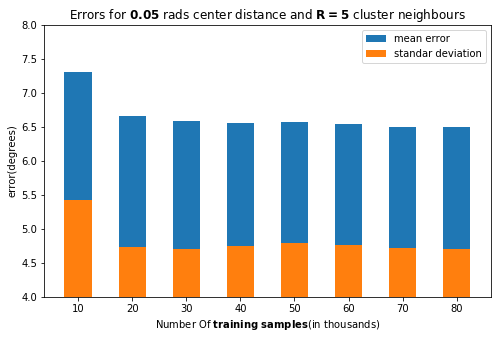

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.figure(figsize=(8,5))

numOfNeighbors=['10', '20', '30', '40', '50', '60', '70', '80']
mean_error= [7.31, 6.66583, 6.5842, 6.5562, 6.57644, 6.54578, 6.50432, 6.49247]
std_error=  [5.42, 4.73184,  4.69651, 4.7532, 4.78703, 4.76607, 4.7156,4.70662]
width=0.5



plt.xlabel(r'Number Of $\bf{{{a}}}$ $\bf{{{b}}}$(in thousands)'.format(a='training', b='samples') )
plt.ylabel('error(degrees)')
#plt.title('Mean error and standar deviation for 5 neighbours and 10,000 training samples')
plt.title(r'Errors for $\bf{{{a}}}$ rads center distance and $\bf{{{b}}}$ cluster neighbours'.format(a='0.05', b='R=5' ) )
axes = plt.gca()
#axes.set_xlim([0,45])
axes.set_ylim([4.0,8.0])

plt.xticks(np.arange(len(numOfNeighbors)),numOfNeighbors)
plt.bar(np.arange(len(numOfNeighbors)), mean_error, width, label='mean error')
plt.bar(np.arange(len(numOfNeighbors)), std_error, width, label='standar deviation')


plt.legend()
plt.savefig('graph3.jpg')
plt.show()





